**Задание**

Постройте модель, используя архитектуру со свёрточными слоями, для классификации Fashion MNIST. Итоговое качество (accuracy) должно быть не ниже 89,5.

In [ ]:
import torchvision as tv
import torch
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
f_mnist_train = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
f_mnist_test  = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)

In [ ]:
BATCH_SIZE=256
train, test = torch.utils.data.DataLoader(f_mnist_train, shuffle=True, batch_size=BATCH_SIZE), torch.utils.data.DataLoader(f_mnist_test, shuffle=True, batch_size=BATCH_SIZE)

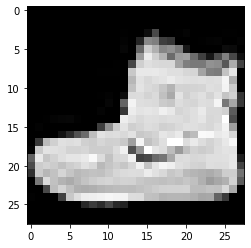

In [ ]:
plt.imshow(f_mnist_train[0][0].numpy().reshape(28,28), cmap='gray')

In [ ]:
for X, y in train:
    print(X.shape, y.shape)
    break

for X, y in test:
    print(X.shape, y.shape)
    break

torch.Size([256, 1, 28, 28]) torch.Size([256])
torch.Size([256, 1, 28, 28]) torch.Size([256])


In [ ]:
LR = 0.01

model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 12, kernel_size=4, padding=1),
    torch.nn.BatchNorm2d(12),
    torch.nn.ReLU(),
    #torch.nn.MaxPool2d(2, stride=2),
    torch.nn.Conv2d(12, 24, kernel_size=4),
    torch.nn.BatchNorm2d(24),
    torch.nn.ReLU(),
    #torch.nn.MaxPool2d(2, stride=2),
    #torch.nn.Dropout(0.25),
    torch.nn.Conv2d(24, 6, kernel_size=2),
    torch.nn.BatchNorm2d(6),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2, stride=2),
    torch.nn.Flatten(),
    torch.nn.Linear(726, 300),
    torch.nn.ReLU(),
    torch.nn.Linear(300, 150),
    torch.nn.ReLU(),
    torch.nn.Linear(150, 50),
    torch.nn.ReLU(),
    torch.nn.Linear(50, 10)
)


loss = torch.nn.CrossEntropyLoss(reduction='sum')
trainer = torch.optim.Adam(model.parameters(), LR)

In [ ]:
X = f_mnist_train[0][0]
X = X.reshape(1, 1, 28, 28)
print(X.shape)
for l in model:
    X = l(X)
    print("Layer {}. X shape: {}".format(l, X.shape))

torch.Size([1, 1, 28, 28])
Layer Conv2d(1, 12, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1)). X shape: torch.Size([1, 12, 27, 27])
Layer BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True). X shape: torch.Size([1, 12, 27, 27])
Layer ReLU(). X shape: torch.Size([1, 12, 27, 27])
Layer Conv2d(12, 24, kernel_size=(4, 4), stride=(1, 1)). X shape: torch.Size([1, 24, 24, 24])
Layer BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True). X shape: torch.Size([1, 24, 24, 24])
Layer ReLU(). X shape: torch.Size([1, 24, 24, 24])
Layer Conv2d(24, 6, kernel_size=(2, 2), stride=(1, 1)). X shape: torch.Size([1, 6, 23, 23])
Layer BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True). X shape: torch.Size([1, 6, 23, 23])
Layer ReLU(). X shape: torch.Size([1, 6, 23, 23])
Layer MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 6, 11, 11])
Layer Flatten(start_dim=1, end_dim=-1)

In [ ]:
NUM_EPOCHS = 10

for epoch in range(1, NUM_EPOCHS+1):

    start=time.time()
    train_loss, train_acc, train_n = 0., 0., 0
    test_loss, test_acc, test_n = 0., 0., 0
    

    model.train()
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_n += len(X)
    
    model.eval()
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_n += len(X)
        
    print("\nepoch: {}, taked: {:.2f}, train_loss: {:.3f}, train_acc: {:.2f}%, test_loss: {:.3f}, test_acc: {:.2f}%".format(
        epoch, time.time() - start, train_loss / train_n, train_acc / train_n *100 , test_loss / test_n, test_acc / test_n *100))


epoch: 1, taked: 79.89, train_loss: 0.506, train_acc: 81.65%, test_loss: 0.354, test_acc: 86.73%

epoch: 2, taked: 76.07, train_loss: 0.298, train_acc: 88.98%, test_loss: 0.303, test_acc: 89.05%

epoch: 3, taked: 73.66, train_loss: 0.256, train_acc: 90.60%, test_loss: 0.300, test_acc: 89.33%

epoch: 4, taked: 73.78, train_loss: 0.233, train_acc: 91.38%, test_loss: 0.270, test_acc: 90.34%

epoch: 5, taked: 75.88, train_loss: 0.212, train_acc: 92.20%, test_loss: 0.274, test_acc: 90.47%

epoch: 6, taked: 74.22, train_loss: 0.197, train_acc: 92.81%, test_loss: 0.257, test_acc: 90.98%

epoch: 7, taked: 75.37, train_loss: 0.187, train_acc: 93.11%, test_loss: 0.273, test_acc: 90.61%

epoch: 8, taked: 75.40, train_loss: 0.174, train_acc: 93.53%, test_loss: 0.259, test_acc: 90.82%

epoch: 9, taked: 73.18, train_loss: 0.164, train_acc: 93.94%, test_loss: 0.274, test_acc: 90.92%

epoch: 10, taked: 74.11, train_loss: 0.154, train_acc: 94.22%, test_loss: 0.281, test_acc: 91.08%
